Фаррахов Фанур 05-204 Вариант 16

In [2]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from sklearn.linear_model import LinearRegression
import pandas as pd

In [14]:
# def f(x, y):
#     return 1 - np.sin(2 * x + y) + 0.3 * y / (x + 2)

def f(x, y):
    return x + np.sin(y/2.25)

# def f(x, y):
#     return x**2 + y**2

a = 1.4
b = 2.4
h = 0.1
x = np.arange(a, b + h, h)
N = len(x)

**Метод Эйлера**

$y_{n+1} = y_n + h f(x_n, y_n)$, $n = \overline{0, N-1}$

In [12]:
y_exp = np.zeros(N)
y_exp[0] = 1

for n in range(N - 1):
    y_exp[n+1] = y_exp[n] + h * f(x[n], y_exp[n])

print(y_exp)

[1.         1.18299564 1.38318406 1.60085936 1.83615589 2.08900175
 2.3590707  2.64573708 2.94804008 3.26466476 3.59394761]


**Неявный метод Эйлера**

$y_{n+1}$ определяется как решение уравнения

$y_{n+1} = y_n + h f(x_{n+1}, y_{n+1})$

Для решения этого уравнения будет применять метод простой итерации

$y^{(k+1)}_{n+1} = y_n + h f(x_{n+1}, y^{(k)}_{n+1})$,  $\qquad y^{(0)}_{n+1} = y_n$

Останавливаем итерации при 

$| y^{(k+1)}_{n+1} - y^{(k)}_{n+1} | < h$

In [17]:
y_imp = np.zeros(n)
y_imp[0] = 2.2

for i in range(n - 1):
    x_next = x[i+1]
    y_next = y_imp[i]
    while True:
        y_prev = y_next
        y_next = y_imp[i] + h * f(x_next, y_next)
        if np.abs(y_next - y_prev) < h:
            break
        
    y_imp[i+1] = y_next

print(y_imp)

[2.2        2.43825699 2.69124386 2.95793991 3.23705461 3.52705396
 3.82620864 4.13266149 4.44450849]


**Метод Рунге-Кутта 2-го порядка**

In [ ]:
# -------------------------------------------------------
# 4. Рунге-Кутта 2-го порядка (Heun)
# -------------------------------------------------------
# y_rk2 = np.zeros(n)
# y_rk2[0] = 0

# for i in range(n - 1):
#     k1 = f(xs[i], y_rk2[i])
#     k2 = f(xs[i] + h, y_rk2[i] + h * k1)
#     y_rk2[i+1] = y_rk2[i] + h * (k1 + k2) / 2

# -------------------------------------------------------
# Метод Рунге-Курта
# -------------------------------------------------------

# Начальное условие
y_rk2 = np.zeros(n)
y_rk2[0] = 0

# Коэффициенты метода
A0 = 1/19
A1 = 1 - A0
a = 1 / (2*A1)
c = a

# Реализация RK2
for i in range(n - 1):
    x = xs[i]
    y = y_rk2[i]
    
    k1 = f(x, y)
    k2 = f(x + c*h, y + a*h*k1)
    
    y_rk2[i+1] = y + h * (A0*k1 + A1*k2)

In [ ]:
# -------------------------------------------------------
# 6. Решение SciPy (для сравнения)
# -------------------------------------------------------
sol = solve_ivp(
    lambda x, y: f(x, y),
    t_span=(0, 1),
    y0=[0],
    t_eval=xs
)

y_scipy = sol.y[0]

In [ ]:
# -------------------------------------------------------
# 8. Таблица результатов
# -------------------------------------------------------
df = pd.DataFrame({
    "x": x,
    "Explicit_Euler": y_exp,
    "Implicit_Euler": y_imp,
    "RK2": y_rk2,
    "SciPy": y_scipy
})

df

,x,Explicit_Euler,Implicit_Euler,RK2,SciPy
0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.1,0.100000,0.073999,0.085793,0.086223
2,0.2,0.171877,0.125543,0.146532,0.147340
3,0.3,0.220099,0.158808,0.186625,0.187767
4,0.4,0.249849,0.178091,0.210753,0.212086
5,0.5,0.266237,0.187595,0.223475,0.224797
6,0.6,0.274034,0.191408,0.229122,0.230318
7,0.7,0.277664,0.193585,0.231844,0.232987
8,0.8,0.281319,0.198286,0.235733,0.237031
9,0.9,0.289116,0.209947,0.244967,0.246519


Таблица приближенных значений:
x	y(x)
0.000	0.000000
0.100	0.046302
0.200	0.083313
0.300	0.111549
0.400	0.131646
0.500	0.144405
0.600	0.150874
0.700	0.152483
0.800	0.151308
0.900	0.150695
1.000	0.157237


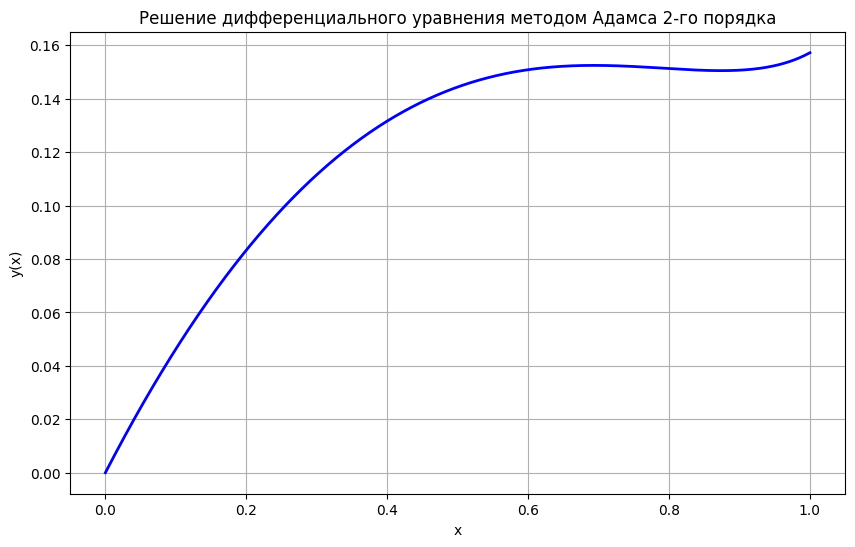

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def solve_implicit_adams():
    # Параметры задачи
    h = 0.001
    x0 = 0.0
    y0 = 0.0
    x_end = 1.0
    
    # Количество шагов
    n_steps = int((x_end - x0) / h) + 1
    
    # Массивы для хранения результатов
    x_values = np.linspace(x0, x_end, n_steps)
    y_values = np.zeros(n_steps)
    y_values[0] = y0
    
    # Функция для решения неявного уравнения относительно y'
    def equation(p, x, y):
        return p - 1 + np.sin(2*x + p) + 0.3*y/(x + 2)
    
    # Метод Рунге-Кутта 2-го порядка для первых двух точек
    def runge_kutta_step(x, y, h):
        # Первая стадия (Эйлера)
        k1 = fsolve(equation, 0, args=(x, y))[0]
        
        # Вторая стадия
        x_temp = x + h
        y_temp = y + h * k1
        k2 = fsolve(equation, 0, args=(x_temp, y_temp))[0]
        
        return y + h * 0.5 * (k1 + k2)
    
    # Вычисление второй точки методом Рунге-Кутта
    y_values[1] = runge_kutta_step(x_values[0], y_values[0], h)
    
    # Вычисление производных в первых двух точках
    f0 = fsolve(equation, 0, args=(x_values[0], y_values[0]))[0]
    f1 = fsolve(equation, 0, args=(x_values[1], y_values[1]))[0]
    
    # Массив для хранения производных
    f_values = np.zeros(n_steps)
    f_values[0] = f0
    f_values[1] = f1
    
    # Метод Адамса 2-го порядка (предиктор-корректор)
    for i in range(1, n_steps - 1):
        # Экстраполяционный метод (предиктор)
        y_pred = y_values[i] + h * (1.5 * f_values[i] - 0.5 * f_values[i-1])
        
        # Интерполяционный метод (корректор)
        # Сначала находим производную в предсказанной точке
        f_pred = fsolve(equation, 0, args=(x_values[i+1], y_pred))[0]
        
        # Корректируем значение
        y_corrected = y_values[i] + h * 0.5 * (f_values[i] + f_pred)
        
        # Обновляем значения
        y_values[i+1] = y_corrected
        f_values[i+1] = fsolve(equation, 0, args=(x_values[i+1], y_values[i+1]))[0]
    
    return x_values, y_values

# Решение задачи
x, y = solve_implicit_adams()

# Вывод результатов
print("Таблица приближенных значений:")
print("x\ty(x)")
for i in range(0, len(x), 100):  # Выводим каждую 100-ю точку
    print(f"{x[i]:.3f}\t{y[i]:.6f}")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Решение дифференциального уравнения методом Адамса 2-го порядка')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()